# 👩‍💻 Activité 2 : transfert learning

<img src="https://cdn.pixabay.com/photo/2018/04/04/18/58/network-3290670_1280.jpg" alt="cable" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - En quoi consiste le transfert learning ?
___
Le **tranfert learning** consiste à utiliser un modèle de deep learning **déjà entrainé** et à le réentrainer pour **améliorer ses performances** sur une tâche spécifique.
___
### - A quoi correspond le modèle VGG16 ?
___
Le **modèle VGG16** est un modèle de **deep learning pour la classification d'images** qui a gagné la compétition **ILSVR (ImageNet Large Scale Visual Recognition Challenge)** en 2014.

Architecture : [VGG-16 | CNN model](https://www.geeksforgeeks.org/vgg-16-cnn-model/)

![VGG16](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg)
___

## ✏️ Activités

### Classification d'images par transfert learning

- Récupérer les photos de chiens et de chats à l'adresse suivante : https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
- Créer des variables des chemins d'accès aux dossiers d'images

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
import scipy

In [2]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Créer la variable du dossier des photos d'entrainement de chats
train_cats_dir = None # A COMPLETER

# Créer la variable du dossier des photos d'entrainement de chiens
train_dogs_dir = None # A COMPLETER

# Créer la variable du dossier des photos de validation de chats
validation_cats_dir = None # A COMPLETER

# Créer la variable du dossier des photos de validation de chiens
validation_dogs_dir = None # A COMPLETER

In [3]:
base_dir = r'cats_and_dogs_filtered\cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

- Visualiser des **images du jeu de données**

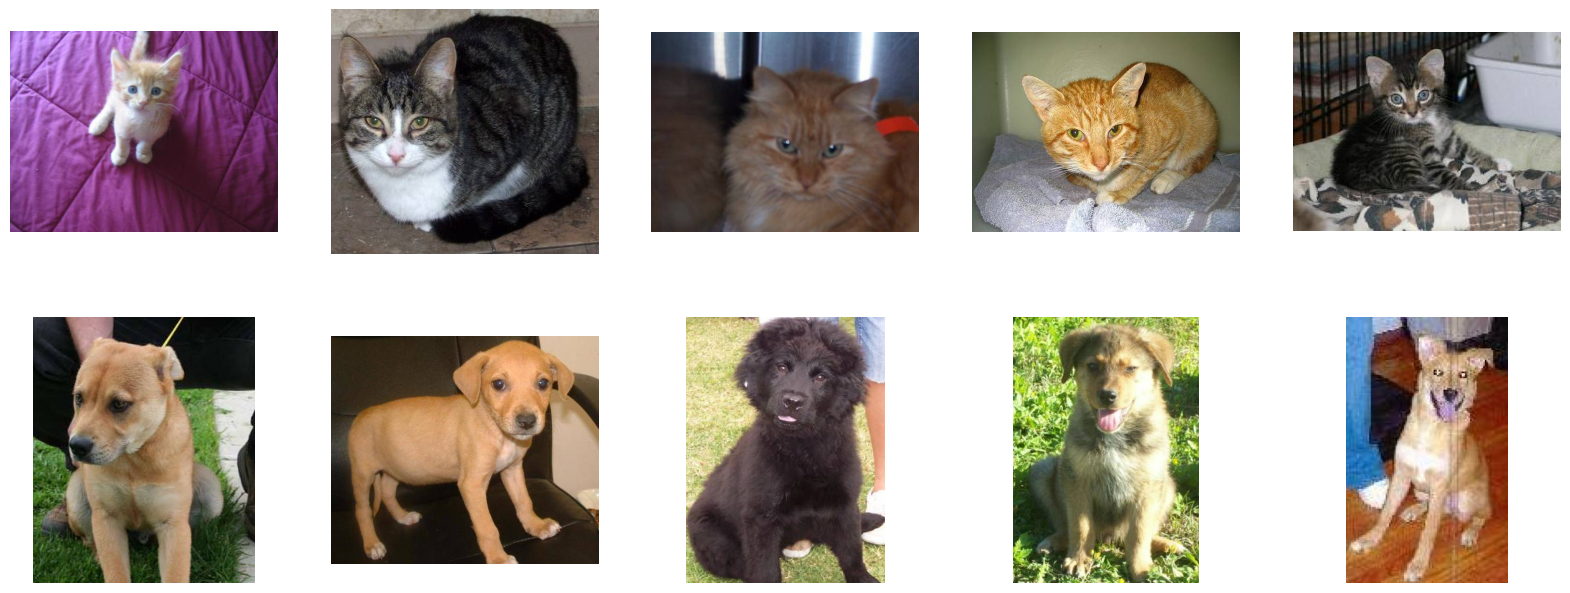

In [4]:
def show_images(nb_images=4):
    nrows = nb_images
    ncols = nb_images
    index = 20
    fig = plt.gcf()
    fig.set_size_inches(ncols*4, nrows*4)
    train_bears_fnames = os.listdir(train_cats_dir)
    train_pandas_fnames = os.listdir(train_dogs_dir)
    bears_pix = [os.path.join(train_cats_dir, fname) 
                    for fname in train_bears_fnames[index:index+nb_images] 
                   ]
    pandas_pix = [os.path.join(train_dogs_dir, fname) 
                    for fname in train_pandas_fnames[index:index+nb_images]
                   ]
    for i, img_path in enumerate(bears_pix+pandas_pix):
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        img = plt.imread(img_path)
        plt.imshow(img)
    plt.show()
show_images(5)

- Création de **2 générateurs d'images** (un pour l'entrainement et un pour la validation) avec augmentation des données. Utilisation la classe "ImageDataGenerator" de Keras

In [5]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 10, class_mode = 'binary', target_size = (224, 224))

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


- Récupération le modèle **pré-entrainé VGG-16** dans la bibliothèque Keras

In [6]:
model = VGG16(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet',
)

- Rendre les poids du modèle pré-entrainé **non-entrainables**. **Vérifier** que les paramètres sont bien passés en non-entrainables

Ressource :

- https://keras.io/api/models/model/#summary-method

In [7]:
for layer in model.layers:
    layer.trainable = False

In [8]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

- Créer un modèle Keras avec le modèle VGG-16 comme **architecture** :
    - Modèle **Vgg-16 pré-entrainé**
    - Couche **Flatten()**
    - Couche **dense à 512 neurones** avec fonction d'**activation Relu**
    - Couche de **dropout à 0.5**
    - Couche **dense** de sortie à un neurone et fonction d'**activation sigmoid**

In [9]:
final_model = tf.keras.Sequential()
final_model.add(model)
final_model.add(tf.keras.layers.Flatten())
final_model.add(tf.keras.layers.Dense(512, activation='relu'))
final_model.add(tf.keras.layers.Dropout(0.5))
final_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

- **Compiler** le modèle avec l'optimiseur tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [10]:
final_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), loss = 'binary_crossentropy',metrics = ['accuracy'])

- **Entrainer** le modèle

In [11]:
final_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 3)

Epoch 1/3
100/100 [==============================] - 296s 3s/step - loss: 2.2926 - accuracy: 0.5720 - val_loss: 0.5442 - val_accuracy: 0.6510
Epoch 2/3
100/100 [==============================] - 315s 3s/step - loss: 0.6552 - accuracy: 0.6870 - val_loss: 0.3077 - val_accuracy: 0.8640
Epoch 3/3
100/100 [==============================] - 319s 3s/step - loss: 0.5175 - accuracy: 0.7660 - val_loss: 0.5396 - val_accuracy: 0.7700


- Faire une **prédiction** sur une nouvelle image

In [12]:
import numpy as np
import PIL
import urllib

In [38]:
#content_image_url = 'https://i-sam.unimedias.fr/2018/08/10/istock-160515715.jpg'
#content_image = np.array(PIL.Image.open(urllib.request.urlopen(content_image_url)))
content_image = np.array(PIL.Image.open(r"D:\A_graver\Webforce3\Semaine_6\cats_and_dogs_filtered\cats_and_dogs_filtered\validation\dogs\dog.2354.jpg"))
#content_image = np.array(PIL.Image.open(r"D:\A_graver\Webforce3\Semaine_6\cats_and_dogs_filtered\cats_and_dogs_filtered\validation\cats\cat.2024.jpg"))
content_image.resize((1,224,224, 3))
content_image.shape

(1, 224, 224, 3)

In [39]:
final_model.predict(content_image)

1/1 [==============================] - 0s 156ms/step


array([[0.99999946]], dtype=float32)

## 🚀 Pour aller plus loin

- https://fr.wikipedia.org/wiki/Apprentissage_par_transfert

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image par Andreas Lischka de Pixabay